In [2]:
import pandas as pd

metadata = pd.read_csv("../dataset/metadata.csv")

metadata

,image_path,mask_path,label
0,benign/benign (1).png,benign/benign (1)_mask.png,Benign
1,benign/benign (10).png,benign/benign (10)_mask.png,Benign
2,benign/benign (100).png,benign/benign (100)_mask.png,Benign
3,benign/benign (101).png,benign/benign (101)_mask.png,Benign
4,benign/benign (102).png,benign/benign (102)_mask.png,Benign
...,...,...,...
775,normal/normal (95).png,normal/normal (95)_mask.png,Normal
776,normal/normal (96).png,normal/normal (96)_mask.png,Normal
777,normal/normal (97).png,normal/normal (97)_mask.png,Normal
778,normal/normal (98).png,normal/normal (98)_mask.png,Normal


In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
IMG_SIZE = (224, 224)

In [5]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [6]:
def preprocess_image(img_path):
    """Loads an image, applies CLAHE, resizes it, normalizes it, and converts it to 3-channel RGB."""
    if not os.path.exists(img_path):
        print(f"Warning: Image not found - {img_path}")
        return None
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = clahe.apply(img)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    img = np.stack([img] * 3, axis=-1)
    
    return img

In [7]:
def preprocess_mask(mask_path):
    """Loads a mask image, resizes it, and ensures binary format (0 or 1)."""
    if not os.path.exists(mask_path):
        print(f"Warning: Mask not found - {mask_path}")
        return None
    
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, IMG_SIZE)
    mask = mask / 255.0
    mask = np.where(mask > 0.5, 1, 0).astype(np.uint8)
    
    return mask

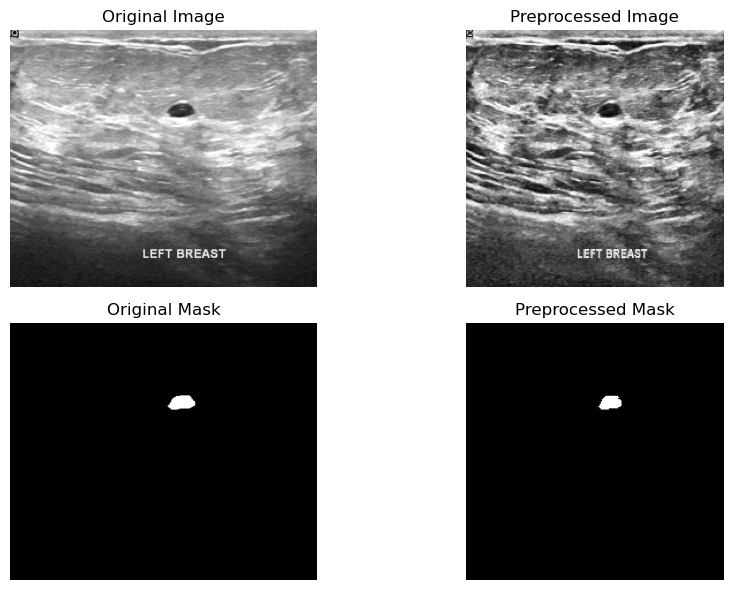

In [8]:
num_samples = 1

for i in range(num_samples):
    img_rel_path = metadata.iloc[i]['image_path']
    mask_rel_path = metadata.iloc[i]['mask_path']
    
    base_img = os.path.splitext(os.path.basename(img_rel_path))[0]
    base_mask = os.path.splitext(os.path.basename(mask_rel_path))[0]
    expected_mask = base_img + "_mask"

    
    full_img_path = os.path.join("../dataset", img_rel_path)
    full_mask_path = os.path.join("../dataset", mask_rel_path)
    
    original_img = cv2.imread(full_img_path, cv2.IMREAD_GRAYSCALE)
    original_mask = cv2.imread(full_mask_path, cv2.IMREAD_GRAYSCALE)
    
    preprocessed_img = preprocess_image(full_img_path)
    preprocessed_mask = preprocess_mask(full_mask_path)
    
    if original_img is not None and preprocessed_img is not None and original_mask is not None and preprocessed_mask is not None:
        plt.figure(figsize=(10, 6))
        
        plt.subplot(2, 2, 1)
        plt.imshow(original_img, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(2, 2, 2)
        plt.imshow(preprocessed_img, cmap='gray')
        plt.title("Preprocessed Image")
        plt.axis('off')
        
        plt.subplot(2, 2, 3)
        plt.imshow(original_mask, cmap='gray')
        plt.title("Original Mask")
        plt.axis('off')
        
        plt.subplot(2, 2, 4)
        plt.imshow(preprocessed_mask, cmap='gray')
        plt.title("Preprocessed Mask")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

In [9]:
processed_images_dir = "../processed-dataset/"
processed_masks_dir = "../processed-dataset/"
dataset_dir = "../dataset"

categories = ["benign", "normal", "malignant"]
for category in categories:
    os.makedirs(os.path.join(processed_images_dir, category), exist_ok=True)
    os.makedirs(os.path.join(processed_masks_dir, category), exist_ok=True)

In [10]:
for idx, row in metadata.iterrows():
    rel_img_path = row['image_path']
    rel_mask_path = row['mask_path']
    category = rel_img_path.split(os.sep)[0]
    
    full_img_path = os.path.join(dataset_dir, rel_img_path)
    base_name, ext = os.path.splitext(os.path.basename(rel_img_path))
    expected_mask_filename = base_name + "_mask" + ext
    full_mask_path = os.path.join(dataset_dir, category, expected_mask_filename)
    
    processed_img = preprocess_image(full_img_path)
    processed_mask = preprocess_mask(full_mask_path)
    
    if processed_img is not None and processed_mask is not None:
        out_img_path = os.path.join(processed_images_dir, category, os.path.basename(rel_img_path))
        out_mask_path = os.path.join(processed_masks_dir, category, expected_mask_filename)
        
        img_to_save = (processed_img * 255).astype(np.uint8)
        mask_to_save = (processed_mask * 255).astype(np.uint8)
        img_to_save_bgr = cv2.cvtColor(img_to_save, cv2.COLOR_RGB2BGR)
        
        cv2.imwrite(out_img_path, img_to_save_bgr)
        cv2.imwrite(out_mask_path, mask_to_save)
        print(f"Processed and saved: {rel_img_path} and {expected_mask_filename}")

print("All processed images and masks have been saved!")

Processed and saved: benign/benign (1).png and benign (1)_mask.png
Processed and saved: benign/benign (10).png and benign (10)_mask.png
Processed and saved: benign/benign (100).png and benign (100)_mask.png
Processed and saved: benign/benign (101).png and benign (101)_mask.png
Processed and saved: benign/benign (102).png and benign (102)_mask.png
Processed and saved: benign/benign (103).png and benign (103)_mask.png
Processed and saved: benign/benign (104).png and benign (104)_mask.png
Processed and saved: benign/benign (105).png and benign (105)_mask.png
Processed and saved: benign/benign (106).png and benign (106)_mask.png
Processed and saved: benign/benign (107).png and benign (107)_mask.png
Processed and saved: benign/benign (108).png and benign (108)_mask.png
Processed and saved: benign/benign (109).png and benign (109)_mask.png
Processed and saved: benign/benign (11).png and benign (11)_mask.png
Processed and saved: benign/benign (110).png and benign (110)_mask.png
Processed and 

Processed and saved: benign/benign (209).png and benign (209)_mask.png
Processed and saved: benign/benign (21).png and benign (21)_mask.png
Processed and saved: benign/benign (210).png and benign (210)_mask.png
Processed and saved: benign/benign (211).png and benign (211)_mask.png
Processed and saved: benign/benign (212).png and benign (212)_mask.png
Processed and saved: benign/benign (213).png and benign (213)_mask.png
Processed and saved: benign/benign (214).png and benign (214)_mask.png
Processed and saved: benign/benign (215).png and benign (215)_mask.png
Processed and saved: benign/benign (216).png and benign (216)_mask.png
Processed and saved: benign/benign (217).png and benign (217)_mask.png
Processed and saved: benign/benign (218).png and benign (218)_mask.png
Processed and saved: benign/benign (219).png and benign (219)_mask.png
Processed and saved: benign/benign (22).png and benign (22)_mask.png
Processed and saved: benign/benign (220).png and benign (220)_mask.png
Processed 

Processed and saved: benign/benign (319).png and benign (319)_mask.png
Processed and saved: benign/benign (32).png and benign (32)_mask.png
Processed and saved: benign/benign (320).png and benign (320)_mask.png
Processed and saved: benign/benign (321).png and benign (321)_mask.png
Processed and saved: benign/benign (322).png and benign (322)_mask.png
Processed and saved: benign/benign (323).png and benign (323)_mask.png
Processed and saved: benign/benign (324).png and benign (324)_mask.png
Processed and saved: benign/benign (325).png and benign (325)_mask.png
Processed and saved: benign/benign (326).png and benign (326)_mask.png
Processed and saved: benign/benign (327).png and benign (327)_mask.png
Processed and saved: benign/benign (328).png and benign (328)_mask.png
Processed and saved: benign/benign (329).png and benign (329)_mask.png
Processed and saved: benign/benign (33).png and benign (33)_mask.png
Processed and saved: benign/benign (330).png and benign (330)_mask.png
Processed 

Processed and saved: benign/benign (44).png and benign (44)_mask.png
Processed and saved: benign/benign (45).png and benign (45)_mask.png
Processed and saved: benign/benign (46).png and benign (46)_mask.png
Processed and saved: benign/benign (47).png and benign (47)_mask.png
Processed and saved: benign/benign (48).png and benign (48)_mask.png
Processed and saved: benign/benign (49).png and benign (49)_mask.png
Processed and saved: benign/benign (5).png and benign (5)_mask.png
Processed and saved: benign/benign (50).png and benign (50)_mask.png
Processed and saved: benign/benign (51).png and benign (51)_mask.png
Processed and saved: benign/benign (52).png and benign (52)_mask.png
Processed and saved: benign/benign (53).png and benign (53)_mask.png
Processed and saved: benign/benign (54).png and benign (54)_mask.png
Processed and saved: benign/benign (55).png and benign (55)_mask.png
Processed and saved: benign/benign (56).png and benign (56)_mask.png
Processed and saved: benign/benign (

Processed and saved: malignant/malignant (166).png and malignant (166)_mask.png
Processed and saved: malignant/malignant (167).png and malignant (167)_mask.png
Processed and saved: malignant/malignant (168).png and malignant (168)_mask.png
Processed and saved: malignant/malignant (169).png and malignant (169)_mask.png
Processed and saved: malignant/malignant (17).png and malignant (17)_mask.png
Processed and saved: malignant/malignant (170).png and malignant (170)_mask.png
Processed and saved: malignant/malignant (171).png and malignant (171)_mask.png
Processed and saved: malignant/malignant (172).png and malignant (172)_mask.png
Processed and saved: malignant/malignant (173).png and malignant (173)_mask.png
Processed and saved: malignant/malignant (174).png and malignant (174)_mask.png
Processed and saved: malignant/malignant (175).png and malignant (175)_mask.png
Processed and saved: malignant/malignant (176).png and malignant (176)_mask.png
Processed and saved: malignant/malignant (

Processed and saved: malignant/malignant (73).png and malignant (73)_mask.png
Processed and saved: malignant/malignant (74).png and malignant (74)_mask.png
Processed and saved: malignant/malignant (75).png and malignant (75)_mask.png
Processed and saved: malignant/malignant (76).png and malignant (76)_mask.png
Processed and saved: malignant/malignant (77).png and malignant (77)_mask.png
Processed and saved: malignant/malignant (78).png and malignant (78)_mask.png
Processed and saved: malignant/malignant (79).png and malignant (79)_mask.png
Processed and saved: malignant/malignant (8).png and malignant (8)_mask.png
Processed and saved: malignant/malignant (80).png and malignant (80)_mask.png
Processed and saved: malignant/malignant (81).png and malignant (81)_mask.png
Processed and saved: malignant/malignant (82).png and malignant (82)_mask.png
Processed and saved: malignant/malignant (83).png and malignant (83)_mask.png
Processed and saved: malignant/malignant (84).png and malignant (8

Processed and saved: normal/normal (69).png and normal (69)_mask.png
Processed and saved: normal/normal (7).png and normal (7)_mask.png
Processed and saved: normal/normal (70).png and normal (70)_mask.png
Processed and saved: normal/normal (71).png and normal (71)_mask.png
Processed and saved: normal/normal (72).png and normal (72)_mask.png
Processed and saved: normal/normal (73).png and normal (73)_mask.png
Processed and saved: normal/normal (74).png and normal (74)_mask.png
Processed and saved: normal/normal (75).png and normal (75)_mask.png
Processed and saved: normal/normal (76).png and normal (76)_mask.png
Processed and saved: normal/normal (77).png and normal (77)_mask.png
Processed and saved: normal/normal (78).png and normal (78)_mask.png
Processed and saved: normal/normal (79).png and normal (79)_mask.png
Processed and saved: normal/normal (8).png and normal (8)_mask.png
Processed and saved: normal/normal (80).png and normal (80)_mask.png
Processed and saved: normal/normal (81

In [15]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(metadata, test_size=0.3, stratify=metadata['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

metadata.loc[train_df.index, 'split'] = 'train'
metadata.loc[val_df.index, 'split'] = 'val'
metadata.loc[test_df.index, 'split'] = 'test'

metadata.to_csv("../processed-dataset/metadata_split.csv", index=False)
print("Dataset split completed and saved to metadata_split.csv!")

Dataset split completed and saved to metadata_split.csv!


In [16]:
metadata

,image_path,mask_path,label,split
0,benign/benign (1).png,benign/benign (1)_mask.png,Benign,train
1,benign/benign (10).png,benign/benign (10)_mask.png,Benign,val
2,benign/benign (100).png,benign/benign (100)_mask.png,Benign,train
3,benign/benign (101).png,benign/benign (101)_mask.png,Benign,train
4,benign/benign (102).png,benign/benign (102)_mask.png,Benign,val
...,...,...,...,...
775,normal/normal (95).png,normal/normal (95)_mask.png,Normal,train
776,normal/normal (96).png,normal/normal (96)_mask.png,Normal,train
777,normal/normal (97).png,normal/normal (97)_mask.png,Normal,train
778,normal/normal (98).png,normal/normal (98)_mask.png,Normal,train
